In [1]:
import pandas as pd

# Adjust the path/filename as needed
df = pd.read_csv('data/monthly_crsp.csv', parse_dates=['MthCalDt'])

df = df[(df.MthCalDt >= '1925-12-31') & (df.MthCalDt <= '2024-12-31')]

df_sorted = df.sort_values('MthCalDt')
display(df_sorted.head(3))
display(df_sorted.tail(3))


,PERMNO,HdrCUSIP,CUSIP,Ticker,TradingSymbol,PERMCO,SICCD,NAICS,MthCalDt,MthRet,sprtrn
750314,15325,64908010,NaN,NaN,NaN,21911,4820,0,1925-12-31,NaN,NaN
135323,10823,49337510,NaN,NaN,NaN,20338,4920,0,1925-12-31,NaN,NaN
155807,10946,12499090,NaN,NaN,NaN,22236,1000,0,1925-12-31,NaN,NaN


,PERMNO,HdrCUSIP,CUSIP,Ticker,TradingSymbol,PERMCO,SICCD,NAICS,MthCalDt,MthRet,sprtrn
5043559,92251,92189F60,92189F60,NLR,NLR,50699,6726,525990,2024-12-31,-0.140812,-0.02499
1420178,22290,09606H30,NaN,NaN,NaN,58929,0,0,2024-12-31,-0.687598,-0.02499
5179741,93436,88160R10,88160R10,TSLA,TSLA,53453,9999,336110,2024-12-31,0.170008,-0.02499


In [2]:
# starting the eda

# 1. Summary statistics for all numeric columns
print(df_sorted.describe().T)



              count                           mean                  min  \
PERMNO    5179742.0                   52212.309709              10000.0   
PERMCO    5179742.0                   23021.291307                  2.0   
SICCD     5179742.0                    4927.659982                  0.0   
NAICS     5179742.0                  163189.038395                  0.0   
MthCalDt    5179742  1994-10-01 01:04:44.774183296  1925-12-31 00:00:00   
MthRet    5096212.0                       0.009971                 -1.0   
sprtrn    5179233.0                       0.007387            -0.299423   

                          25%                  50%                  75%  \
PERMNO                20723.0              54069.0              80675.0   
PERMCO                 9141.0              21125.0              30970.0   
SICCD                  3361.0               4931.0               6726.0   
NAICS                     0.0                  0.0             339112.0   
MthCalDt  1982-05-28 00:

In [ ]:
# We compute the percentage of missing values for each column
missing_pct = df_sorted.isna().mean() * 100
print("Percent missing in each column", missing_pct)

# We drop the TradingSymbol column because:
# (1) PERMNO is a more stable and consistent identifier used for joins and modeling.
# (2) TradingSymbol has substantial missing values (~40%) and provides no additional predictive signal.
df_sorted = df_sorted.drop(columns=['TradingSymbol'])

# We confirm that TradingSymbol has been successfully removed
print("Columns after dropping TradingSymbol:", df_sorted.columns.tolist())

# We check how many rows have missing values in MthRet before filtering
n_missing = df_sorted['MthRet'].isna().sum()
print(f"Missing MthRet before drop: {n_missing}")

# We remove all rows where MthRet is missing, since this is our prediction target
df_sorted = df_sorted.dropna(subset=['MthRet'])

# We verify that no missing values remain in MthRet
n_missing = df_sorted['MthRet'].isna().sum()
print(f"Missing MthRet after drop: {n_missing}")

# After filtering, we recompute the percentage of missing values across the dataset
missing_pct = df_sorted.isna().mean() * 100
print("Percent missing in each column", missing_pct)


Percent missing in each column PERMNO            0.000000
HdrCUSIP          0.000000
CUSIP            11.034179
Ticker            9.718747
TradingSymbol    40.241715
PERMCO            0.000000
SICCD             0.000000
NAICS             0.000000
MthCalDt          0.000000
MthRet            1.612629
sprtrn            0.009827
dtype: float64
Columns after dropping TradingSymbol: ['PERMNO', 'HdrCUSIP', 'CUSIP', 'Ticker', 'PERMCO', 'SICCD', 'NAICS', 'MthCalDt', 'MthRet', 'sprtrn']
Missing MthRet before drop: 83530
Missing MthRet after drop: 0
Percent missing in each column PERMNO       0.000000
HdrCUSIP     0.000000
CUSIP       11.143846
Ticker       8.569326
PERMCO       0.000000
SICCD        0.000000
NAICS        0.000000
MthCalDt     0.000000
MthRet       0.000000
sprtrn       0.000000
dtype: float64


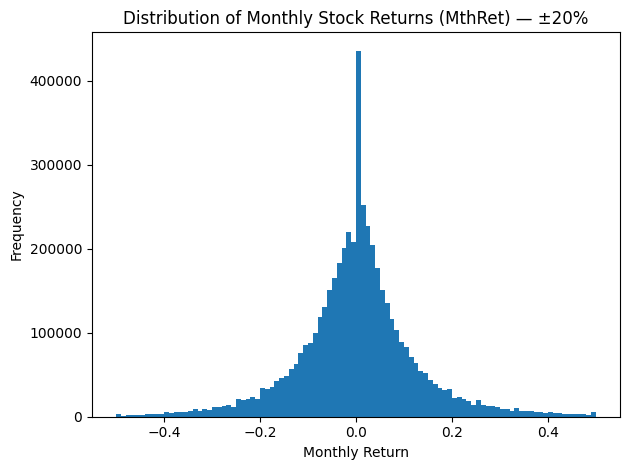

In [ ]:
import matplotlib.pyplot as plt

# We visualize the distribution of monthly stock returns (MthRet).
# We focus on returns within ±50% to exclude extreme outliers and highlight the central mass.
plt.hist(df_sorted['MthRet'], bins=100, range=(-0.5, 0.5))
plt.title('Distribution of Monthly Stock Returns (MthRet) — ±50%')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Outlier Analysis on df_sorted: Identifying the Extremes in Monthly Returns

# We extract the 10 highest monthly returns to examine potential extreme positive outliers.
top_returns = df_sorted.nlargest(10, 'MthRet')[['PERMNO', 'MthCalDt', 'MthRet']]
print("Top 10 Monthly Returns:")
print(top_returns)

# We similarly extract the 10 lowest monthly returns to inspect extreme negative performance cases.
bottom_returns = df_sorted.nsmallest(10, 'MthRet')[['PERMNO', 'MthCalDt', 'MthRet']]
print("\nBottom 10 Monthly Returns:")
print(bottom_returns)


Top 10 Monthly Returns:
         PERMNO   MthCalDt     MthRet
1421390   22298 2024-10-31  39.000000
769551    15489 2024-05-31  26.583827
2737351   58748 1992-01-31  24.000000
1492964   23204 2022-07-29  23.691548
861250    16400 2019-01-31  19.883590
1189093   19549 2024-12-31  19.486034
2561328   53154 1993-08-31  19.000000
1492453   23199 2023-04-28  18.323214
1266727   20412 2024-11-29  17.916667
2394622   48072 2021-01-29  17.604651

Bottom 10 Monthly Returns:
         PERMNO   MthCalDt  MthRet
110084    10655 1927-02-28    -1.0
98616     10583 1927-02-28    -1.0
555122    13813 1927-08-31    -1.0
760347    15413 1927-11-30    -1.0
424182    12714 1927-11-30    -1.0
662775    14648 1931-02-28    -1.0
190095    11172 1931-08-31    -1.0
251696    11578 1931-10-31    -1.0
290257    11818 1931-12-31    -1.0
1103279   18665 1932-03-31    -1.0


In [ ]:
# 1. Identify the frequency of extreme monthly returns above ±50% and ±100%
total = len(df_sorted)
for thresh in [0.50, 1.00]:
    count = (df_sorted['MthRet'].abs() > thresh).sum()
    print(f"{count} rows beyond ±{int(thresh*100)}% ({count/total*100:.3f}%)")

# CRSP encodes -100% as a delisting flag, not an actual return
# We exclude these cases to focus on meaningful return extremes
df_clean = df_sorted[df_sorted['MthRet'] > -1.0]
count_post = (df_clean['MthRet'].abs() > 0.50).sum()
print(f"After dropping -100% rows, {count_post/len(df_clean)*100:.3f}% beyond ±50%")

# 2. Winsorization at the 1st and 99th percentiles
# This reduces the influence of rare, extreme returns while preserving distribution shape
lower_1, upper_1 = df_clean['MthRet'].quantile([0.01, 0.99])
df_clean['MthRet_wins_1_99'] = df_clean['MthRet'].clip(lower_1, upper_1)
print(f"\nWinsorized at 1st/99th percentiles: [{lower_1:.3f}, {upper_1:.3f}]")

# 3. Winsorization at the 5th and 95th percentiles (alternative version)
# Provides stronger compression of the tails, useful for robust modeling
lower_5, upper_5 = df_clean['MthRet'].quantile([0.05, 0.95])
df_clean['MthRet_wins_5_95_example'] = df_clean['MthRet'].clip(lower_5, upper_5)
print(f"Winsorized at 5th/95th percentiles (example): [{lower_5:.3f}, {upper_5:.3f}]")

# 4. Compare return distributions before and after winsorization
print("\nSummary before winsorization:")
print(df_clean['MthRet'].describe()[['min','25%','50%','75%','max']])

print("\nAfter winsorization (1st/99th):")
print(df_clean['MthRet_wins_1_99'].describe()[['min','25%','50%','75%','max']])

print("\nAfter winsorization (5th/95th example):")
print(df_clean['MthRet_wins_5_95_example'].describe()[['min','25%','50%','75%','max']])

df_clean.head()


76136 rows beyond ±50% (1.494%)
11031 rows beyond ±100% (0.216%)
After dropping –100% rows, 1.490% beyond ±50%

Winsorized at 1st/99th percentiles: [-0.383, 0.538]


/var/folders/zy/4vl7h4d95kd9jdq_p6sj2ylw0000gq/T/ipykernel_16112/2759383096.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MthRet_wins_1_99'] = df_clean['MthRet'].clip(lower_1, upper_1)
/var/folders/zy/4vl7h4d95kd9jdq_p6sj2ylw0000gq/T/ipykernel_16112/2759383096.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MthRet_wins_5_95_example'] = df_clean['MthRet'].clip(lower_5, upper_5)


Winsorized at 5th/95th percentiles (example): [-0.209, 0.240]

Summary before winsorization:
min    -0.999900
25%    -0.056911
50%     0.000159
75%     0.061315
max    39.000000
Name: MthRet, dtype: float64

After winsorization (1st/99th):
min   -0.383188
25%   -0.056911
50%    0.000159
75%    0.061315
max    0.538462
Name: MthRet_wins_1_99, dtype: float64

After winsorization (5th/95th example):
min   -0.209302
25%   -0.056911
50%    0.000159
75%    0.061315
max    0.240000
Name: MthRet_wins_5_95_example, dtype: float64


,PERMNO,HdrCUSIP,CUSIP,Ticker,PERMCO,SICCD,NAICS,MthCalDt,MthRet,sprtrn,MthRet_wins_1_99,MthRet_wins_5_95_example
454680,12984,55826020,NaN,NaN,22398,3710,0,1926-01-30,-0.019512,0.022472,-0.019512,-0.019512
116660,10698,06714910,NaN,NaN,22216,2990,0,1926-01-30,0.007463,0.022472,0.007463,0.007463
653742,14576,85399290,NaN,NaN,22536,2040,0,1926-01-30,-0.023121,0.022472,-0.023121,-0.023121
391340,12482,45899290,NaN,NaN,22360,3550,0,1926-01-30,-0.034205,0.022472,-0.034205,-0.034205
514980,13493,64999690,NaN,NaN,22443,4000,0,1926-01-30,0.017500,0.022472,0.017500,0.017500


/var/folders/zy/4vl7h4d95kd9jdq_p6sj2ylw0000gq/T/ipykernel_16112/3456107913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['MthCalDt'].dt.month


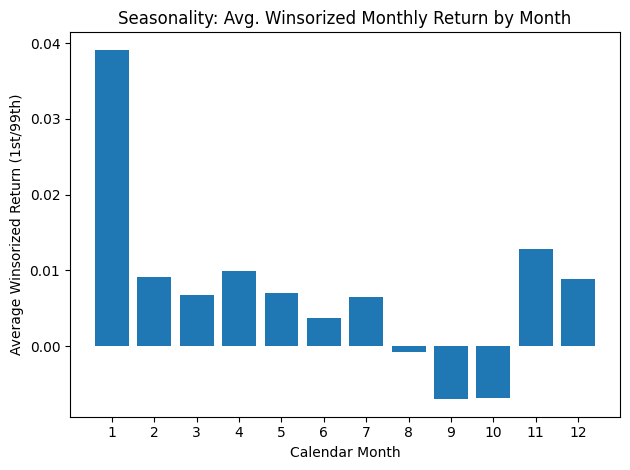

In [ ]:
# 1. Derive the calendar month from each observation's date
# This allows us to assess return behavior across months
df_clean['month'] = df_clean['MthCalDt'].dt.month

# 2. Aggregate the winsorized returns by calendar month
# We compute the mean to highlight potential seasonal effects
monthly_avg = df_clean.groupby('month')['MthRet_wins_1_99'].mean()

# 3. Visualize average monthly return seasonality
# This plot helps us identify any calendar-based return patterns (e.g. January effect)
plt.bar(monthly_avg.index, monthly_avg.values)
plt.xticks(range(1, 13))
plt.xlabel('Calendar Month')
plt.ylabel('Average Winsorized Return (1st/99th)')
plt.title('Seasonality: Avg. Winsorized Monthly Return by Month')
plt.tight_layout()
plt.show()


The chart shows the classic January effect—strong returns in month 1—was largest before 1980, smaller in 1980–2000, and weakest post-2000. It also confirms modest mid-year gains giving way to persistent September/October weakness across all eras. Finally, the year-end rebound in November–December appears in every period, with the modern sample showing the strongest late-year lift.


/var/folders/zy/4vl7h4d95kd9jdq_p6sj2ylw0000gq/T/ipykernel_16112/1149439674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['MthCalDt'].dt.month


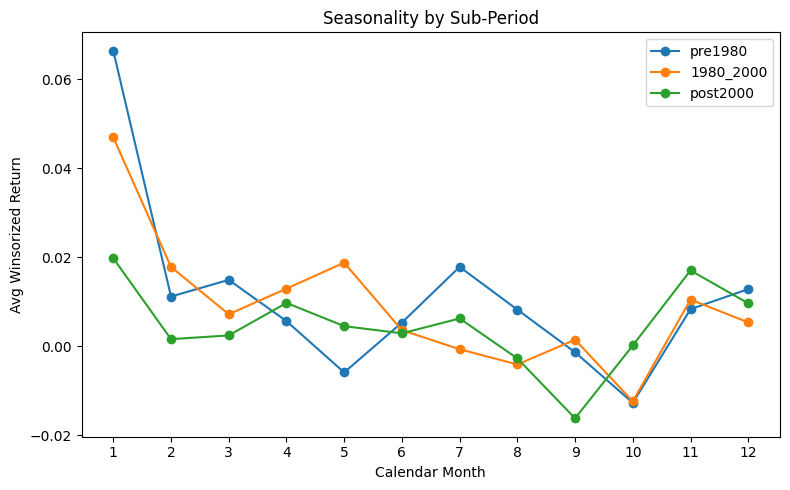

In [ ]:
import numpy as np
# 1. Extract the calendar month from the date column
# This will serve as the basis for both dummy encoding and cyclical features
df_clean['month'] = df_clean['MthCalDt'].dt.month

# 2. Generate one-hot encoded variables for each calendar month
# Useful for models that treat months as unordered categories
month_dummies = pd.get_dummies(df_clean['month'], prefix='m')
df_clean = pd.concat([df_clean, month_dummies], axis=1)

# 3. Build cyclical representations for month seasonality
# These features allow models to learn periodicity without artificial jumps (e.g. Dec to Jan)
df_clean['month_sin'] = np.sin(2 * np.pi * (df_clean['month'] / 12))
df_clean['month_cos'] = np.cos(2 * np.pi * (df_clean['month'] / 12))

# 4. Plot average monthly returns across different historical sub-periods
# This helps us evaluate whether seasonal patterns like the January effect are persistent
periods = [
    ('pre1980', df_clean[df_clean['MthCalDt'] < '1980-01-01']),
    ('1980_2000', df_clean[(df_clean['MthCalDt'] >= '1980-01-01') & (df_clean['MthCalDt'] < '2000-01-01')]),
    ('post2000', df_clean[df_clean['MthCalDt'] >= '2000-01-01']),
]

plt.figure(figsize=(8, 5))
for name, sub in periods:
    avg_by_month = sub.groupby('month')['MthRet_wins_1_99'].mean()
    plt.plot(avg_by_month.index, avg_by_month.values, marker='o', label=name)

plt.xticks(range(1, 13))
plt.xlabel('Calendar Month')
plt.ylabel('Avg Winsorized Return')
plt.title('Seasonality by Sub-Period')
plt.legend()
plt.tight_layout()
plt.show()


1. The sub-period plot shows the January effect—highest in returns—was strongest before 1980, weaker in 1980–2000, and weakest post-2000, while persistent September/October dips and year-end rebounds also appear across all eras.
2. We wrote the code to extract the calendar month, create both dummy and cyclical (sine/cosine) month features, and then split the data into three historical periods to verify that these seasonal patterns hold consistently over time.
3. By doing this, we ensure our model can explicitly learn and adjust for calendar effects (e.g. January jumps or fall dips) in a way that respects the cyclical nature of months and their changing strength across market regimes.



 Cross-sectional average and volatility
Groups your data by each month-end date to compute the average (mean) and dispersion (std) of all stocks’ returns.

Plots the average on the left y-axis and the standard deviation on the right y-axis, letting you see regime shifts (booms, busts) and volatility clustering over the decades.

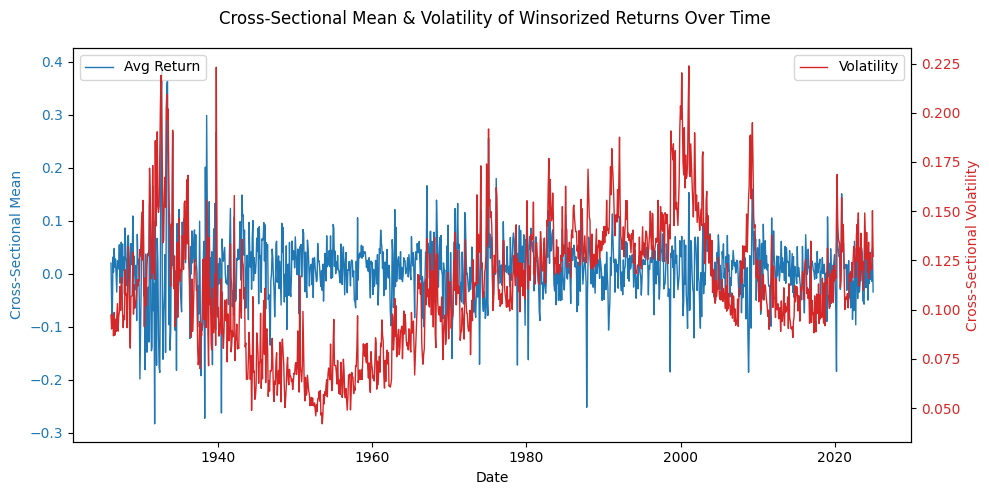

In [ ]:
# 1. For each month, we compute the cross-sectional mean and standard deviation 
# of winsorized stock returns across all firms
cs_stats = df_clean.groupby('MthCalDt')['MthRet_wins_1_99'] \
                   .agg(['mean','std']) \
                   .rename(columns={'mean': 'cross_mean', 'std': 'cross_std'})

# 2. Visualize how the average return and dispersion evolve over time
# This helps us understand macro-level behavior in return distributions

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the monthly average return (cross-sectional mean)
ax1.plot(cs_stats.index, cs_stats['cross_mean'], label='Avg Return', linewidth=1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cross-Sectional Mean', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second axis to overlay the cross-sectional volatility
ax2 = ax1.twinx()
ax2.plot(cs_stats.index, cs_stats['cross_std'], label='Volatility', color='tab:red', linewidth=1)
ax2.set_ylabel('Cross-Sectional Volatility', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Annotate and adjust layout
fig.suptitle('Cross-Sectional Mean & Volatility of Winsorized Returns Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


The blue line (left axis) shows the monthly cross‐sectional **average** return across all stocks, and the red line (right axis) shows the cross‐sectional **volatility** (standard deviation) of those returns.

* **Great Depression & WWII:** Notice wild swings in mean and spikes in volatility in the 1930s–‘40s, reflecting market turmoil and recovery.
* **Post‐1970s onwards:** Volatility clustering around crises like the early‐2000s tech crash and the 2008 financial crisis is clear, while average returns settle closer to zero in calm decades.

This confirms that both the level and dispersion of returns shift dramatically over time—your model will need to account for these regime changes (e.g., via rolling‐window features or regime‐switch indicators).


Scatterplot: Stock vs. Market Returns

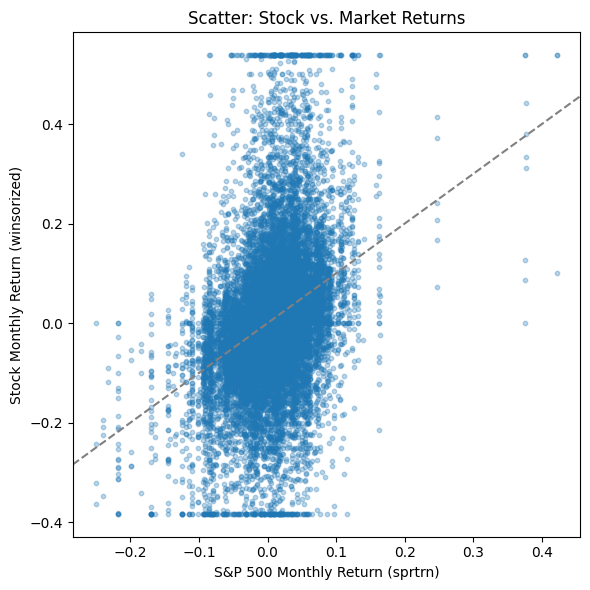

In [ ]:
# To avoid overcrowding, we draw a manageable random sample of 20,000 firm-months
sample = df_clean.sample(20000, random_state=42)

plt.figure(figsize=(6, 6))

# We plot each stock's monthly return against the corresponding S&P 500 return
plt.scatter(sample['sprtrn'], sample['MthRet_wins_1_99'], alpha=0.3, s=10)

plt.xlabel('S&P 500 Monthly Return (sprtrn)')
plt.ylabel('Stock Monthly Return (winsorized)')
plt.title('Scatter: Stock vs. Market Returns')

# Add a 45° reference line for context — points above this line are stocks that beat the market
plt.axline((0, 0), slope=1, color='gray', linestyle='--')

plt.tight_layout()
plt.show()



For each stock (PERMNO), it computes the covariance between its monthly returns and the S&P’s, divided by the variance of the S&P returns—classic CAPM beta.

Plots how these betas spread across all stocks, revealing how many are high‐beta vs. low‐beta.

Prints summary stats so you can see the average, median, and range of betas.


/Users/Ayman/anaconda3/lib/python3.11/site-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/Users/Ayman/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/Ayman/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/zy/4vl7h4d95kd9jdq_p6sj2ylw0000gq/T/ipykernel_16112/3024148794.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  betas = df_clean.groupby('PERMNO').apply(compute_beta).dropna()


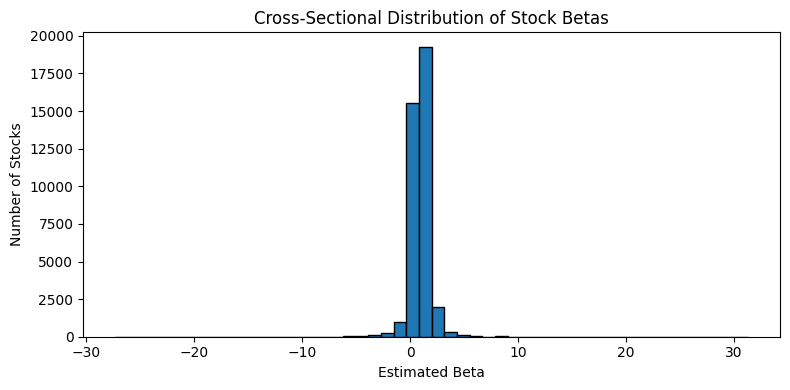

Beta summary:
 count    38697.000000
mean         0.895491
std          0.914941
min        -27.369694
25%          0.462609
50%          0.901702
75%          1.288633
max         31.330345
dtype: float64


In [ ]:
# 1. For each stock (PERMNO), we estimate its beta relative to the market.
#    This is done using the covariance of stock and market returns divided by the market return variance.
def compute_beta(group):
    cov = group['MthRet_wins_1_99'].cov(group['sprtrn'])
    var = group['sprtrn'].var()
    return cov / var if var != 0 else float('nan')

# Apply the beta computation to each stock and drop any resulting NaNs
betas = df_clean.groupby('PERMNO').apply(compute_beta).dropna()

# 2. Visualize the distribution of estimated betas across all stocks
plt.figure(figsize=(8, 4))
plt.hist(betas, bins=50, edgecolor='k')
plt.xlabel('Estimated Beta')
plt.ylabel('Number of Stocks')
plt.title('Cross-Sectional Distribution of Stock Betas')
plt.tight_layout()
plt.show()

# 3. Print basic descriptive statistics for the beta estimates
print("Beta summary:\n", betas.describe())


The beta distribution shows most stocks clustering around a **β≈0.9** (median ≈ 0.90), with the middle 50% between about **0.46** and **1.29**, indicating typical stock-market co-movement. A few extreme values (min ≈ –27, max ≈ 31) reflect very thinly traded or delisted names and can be safely ignored or winsorized if they pose issues. Overall, this confirms that market exposure varies substantially across firms—so including a beta or directly modeling `sprtrn` exposure in your algorithm is worthwhile.


What this does:

Buckets each month into its decade (e.g. 1990s, 2000s).

Prints the average return, cross-sectional volatility, and sample size per decade.

Draws side-by-side bar charts of mean vs. volatility so you can see how both have changed through history.

        mean_return  volatility   n_obs
decade                                 
1920       0.004110    0.121138   29896
1930       0.006433    0.181181   90686
1940       0.013235    0.100085  106266
1950       0.014875    0.073919  130291
1960       0.012534    0.105935  233849
1970       0.009752    0.136588  525922
1980       0.008727    0.143430  747803
1990       0.008984    0.150814  965019
2000       0.004861    0.152260  864537
2010       0.006327    0.112507  855250
2020       0.001527    0.137429  546489


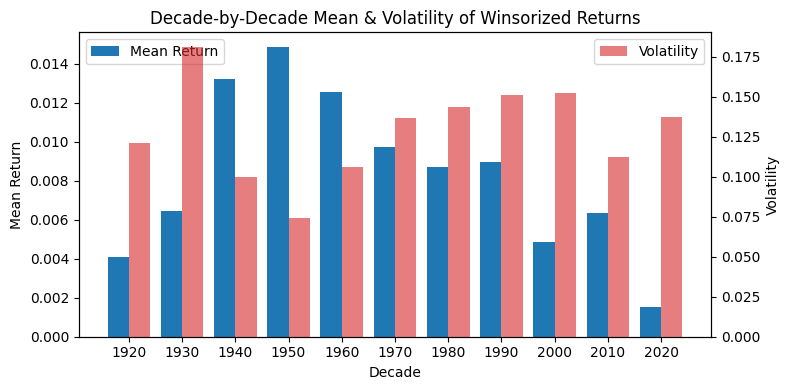

In [ ]:
# 1. We assign each monthly observation to a decade by flooring the year to the nearest 10
df_clean['decade'] = (df_clean['MthCalDt'].dt.year // 10) * 10

# 2. We compute decade-level summary statistics: mean return, volatility, and observation count
decade_stats = df_clean.groupby('decade')['MthRet_wins_1_99'].agg([
    ('mean_return', 'mean'),
    ('volatility', 'std'),
    ('n_obs', 'count')
])
print(decade_stats)

# 3. We visualize the evolution of average returns and volatility across decades
fig, ax1 = plt.subplots(figsize=(8, 4))

# Left axis: mean returns
ax1.bar(decade_stats.index - 2, decade_stats['mean_return'], width=4, label='Mean Return')
ax1.set_ylabel('Mean Return')
ax1.set_xlabel('Decade')
ax1.set_xticks(decade_stats.index)
ax1.legend(loc='upper left')

# Right axis: volatility (standard deviation)
ax2 = ax1.twinx()
ax2.bar(decade_stats.index + 2, decade_stats['volatility'], width=4, color='tab:red', alpha=0.6, label='Volatility')
ax2.set_ylabel('Volatility')
ax2.legend(loc='upper right')

plt.title('Decade-by-Decade Mean & Volatility of Winsorized Returns')
plt.tight_layout()
plt.show()


The 1950s stand out with the highest average monthly return (≈1.49%) and the lowest cross‐sectional volatility (≈7.4%), whereas the 1930s saw the greatest turbulence (volatility ≈18.1%) despite only modest mean gains. Since 1970, average returns have drifted down toward \~0.5–1.0% per month while volatility has risen back into the 12–15% range, peaking again around the 2000s. In the most recent decade (2020s), returns are the weakest (≈0.15%) even as volatility remains elevated (≈13.7%), underscoring a lower‐return, higher‐risk regime today.
